In [2]:
from langchain_community.tools import WikipediaQueryRun,ArxivQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,AIMessage
import os   
import dotenv

In [3]:
dotenv.load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_classic.agents import initialize_agent,AgentType
llm = ChatGroq(model = "llama-3.3-70b-versatile",verbose=True,max_tokens=500,api_key=GROQ_API_KEY)

In [20]:
from typing_extensions import TypedDict
from typing import Optional

class State(TypedDict, total=False):  
    topic: str
    characters: Optional[str]
    common_goal: Optional[str]
    story: Optional[str]


In [27]:
def characters(state:State):
    msg = llm.invoke(f'write me about 3 characters in a story, only describe their appearances, and generate only one sentence per character about the topic: {state["topic"]}')
    return {"characters":msg.content}
def common_goal(state:State):
    msg = llm.invoke(f'give me a one sentence common goal all the characters can have in a story about the topic: {state["topic"]}')
    return {'common_goal':msg.content}
def aggregator(state:State):
    msg = llm.invoke(
        f"write me a short story using these elements:\n"
        f"Characters : {state['characters']}\n"
        f"Common Goal : {state['common_goal']}"
    )
    return {"story":msg.content}

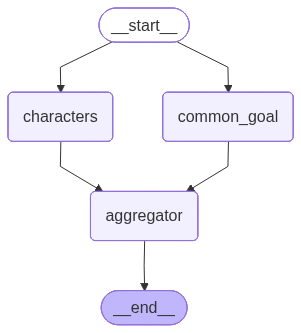

In [28]:
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image

builder = StateGraph(State)
builder.add_node("characters",characters)
builder.add_node("common_goal",common_goal)
builder.add_node("aggregator",aggregator)

builder.add_edge(START,"characters")
builder.add_edge(START,"common_goal")
builder.add_edge("characters",'aggregator')
builder.add_edge("common_goal",'aggregator')
builder.add_edge("aggregator",END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
res = graph.invoke({"topic":"dungeon exploration"})
print(res["characters"],end="\n********\n")
print(res["common_goal"],end="\n********\n")
print(res['story'])

As they ventured into the dungeon, Eilif Stonefist, a sturdy dwarf with a thick beard and worn leather armor, led the way with his battle-axe at the ready.
The delicate features and raven-black hair of Elara Moonwhisper, an elf with piercing green eyes and a slender yet athletic build, seemed almost out of place amidst the dark and dusty dungeon corridors.
Kael Darkhaven, a human with a rugged, scarred face and jet-black hair that fell to his shoulders, navigated the treacherous dungeon tunnels with ease, his piercing blue eyes scanning the shadows for hidden dangers.
********
The characters all share the common goal of retrieving the legendary "Eclipse Crystal" from the depths of the long-abandoned dungeon, rumored to possess the power to bring prosperity back to their beleaguered kingdom.
********
As they ventured into the dungeon, Eilif Stonefist, a sturdy dwarf with a thick beard and worn leather armor, led the way with his battle-axe at the ready. The air was thick with the stench